# Finding the Best Markets to Advertise In #

In this project we will assume that we're working for an an **e-learning company** that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. We want to **promote our product and we'd like to invest some money in advertisement**. 

**Our goal** in this project is to **find out the two best markets to advertise our product in**.

### Collecting the data ###

We can try to search existing data that might be relevant for our purpose. One good candidate is the data from freeCodeCamp's 2017 New Coder Survey. freeCodeCamp is a free e-learning platform that offers courses on web development. Because they run a popular Medium publication (over 400,000 followers), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

The survey data is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import collections

%matplotlib inline
pd.set_option('display.max_columns', None)


In [2]:
!pip install pywaffle
from pywaffle import Waffle

In [3]:
survey = pd.read_csv(r'C:\Users\Pikto\Documents\MS TM\DataQuest\2017-fCC-New-Coders-Survey-Data.csv',engine='python',sep = ',')
survey.head(2)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's specifiy the type of the two columns that seem to have mixed types.

In [4]:
dtype={"JobInterestOther": str, "CodeEventOther": str}

In [5]:
survey.head(2)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most columns are self-explanatory plus we can find some more information in the *row-data* file in the repository we linked above. 

Let's select only the columns that can help us in our analysis. What e are willing to know about the respondants is : 

- subject interests
- willing to invest in education and the extent of budget
- current geographic location
- preferred language for communication and/or some related information

We dropped some columns that are ID or survey timestamp related columns (ex: *ID.x, ID.y, NetworkID, Part1EndTime, Part1StartTime, Part2EndTime, Part2StartTime*) and we also got rid of the columns about the website and YouTube channels used by the participants to learn. Finally we drop the *"Interested"* column who are sum up in one column *'JobRoleInterest'* Those information are to detailled and not relevant for our analysis.

In [6]:
survey = survey[["Age",'AttendedBootcamp',"CountryLive","EmploymentField",'EmploymentStatus','ExpectedEarning','FirstDevJob','Gender','HasDebt','Income','IsEthnicMinority','IsReceiveDisabilitiesBenefits','IsSoftwareDev','JobRoleInterest','MoneyForLearning','MonthsProgramming','SchoolDegree','SchoolMajor']]

In [7]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18175 entries, 0 to 18174
Data columns (total 18 columns):
Age                              15367 non-null float64
AttendedBootcamp                 17709 non-null float64
CountryLive                      15336 non-null object
EmploymentField                  8116 non-null object
EmploymentStatus                 14345 non-null object
ExpectedEarning                  7200 non-null float64
FirstDevJob                      4508 non-null float64
Gender                           15454 non-null object
HasDebt                          15291 non-null float64
Income                           7623 non-null float64
IsEthnicMinority                 15293 non-null float64
IsReceiveDisabilitiesBenefits    15222 non-null float64
IsSoftwareDev                    18068 non-null float64
JobRoleInterest                  6992 non-null object
MoneyForLearning                 16577 non-null float64
MonthsProgramming                17084 non-null float64
Schoo

### "JobRoleInterest" ###

For the purpose of our analysis, we want to answer questions about a population of new coders that are interested in the subjects we teach. We'd like to know:

- Where are these new coders located.
- What are the locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest and it has the right categories of people for our purpose. Let's take a look at the "JobRoleInterest" column first.

In [8]:
survey["JobRoleInterest"].head()

0                                                  NaN
1                             Full-Stack Web Developer
2      Front-End Web Developer, Back-End Web Develo...
3      Front-End Web Developer, Full-Stack Web Deve...
4    Full-Stack Web Developer, Information Security...
Name: JobRoleInterest, dtype: object

In [9]:
job_role_answer = survey["JobRoleInterest"].notnull().sum()/(survey["JobRoleInterest"].isnull().sum()+survey["JobRoleInterest"].notnull().sum())*100
print(job_role_answer.round(2),"% of participants answered that question")

38.47 % of participants answered that question


Not so many people answered that question, but we still have enough data to study this column!

We can see that every respondant could choose different answers.



In [10]:
nr_of_tags = []
for i in survey["JobRoleInterest"]:
    if i is not np.nan:
        nr_of_tags.append(len(i.split(",")))

from collections import Counter
Counter(nr_of_tags)

Counter({1: 2213,
         5: 842,
         3: 1111,
         6: 470,
         4: 1064,
         2: 761,
         12: 21,
         7: 270,
         8: 123,
         10: 33,
         9: 69,
         11: 13,
         13: 2})

We can see that even if the main answer is composed of 1 subject, people tend to choose several subject that they would like to study. This is a good thing for us, as someone who is interested in Data Science could also be interested in Web or Mobile Development.

We now need to clean this column and check the frequency for each "tag" (subject) possible. Some of the roles are written differently (*"Front-End"* vs *"Front End"* , any Uppercase left, any useless whitespace left...)

In [11]:
def clean_jobrole(roles):
    roles_list = []
    if roles is not np.nan:
        for role in roles.split(","):
            roles_list.append(role.replace("-" , " ").replace("/", "").strip().lower())
        roles = roles_list
    return roles

survey['JobRoleInterest'] = survey.JobRoleInterest.apply(clean_jobrole)

Now let's dig into the analysis of this column

In [12]:
frequency = {}

for i,c in survey["JobRoleInterest"].iteritems():
    if c is not np.nan:
        for x in c:
            if x in frequency:
                frequency[x] += 1
            else:
                frequency[x] = 1
                
# We compute what percentage of respondant chose each tags!
for i in frequency:
    frequency[i] = (frequency[i]/survey["JobRoleInterest"].notnull().sum())*100
    
for x in frequency:
    print (x,':', round(frequency[x],3), "%")

full stack web developer : 60.04 %
front end web developer : 50.529 %
back end web developer : 39.645 %
devops  sysadmin : 13.258 %
mobile developer : 32.966 %
information security : 18.965 %
quality assurance engineer : 7.122 %
game developer : 23.284 %
user experience designer : 21.01 %
data scientist : 23.498 %
data engineer : 17.849 %
product manager : 11.642 %
ethical hacker : 0.029 %
security expert : 0.014 %
technical writer : 0.014 %
researcher : 0.029 %
systems engineer : 0.014 %
desktop applications programmer : 0.014 %
robotics : 0.014 %
non technical : 0.014 %
ui design : 0.014 %
software engineer : 0.229 %
email coder : 0.014 %
data analyst : 0.072 %
i dont yet know : 0.014 %
ux developerdesigner : 0.014 %
support scientific resaerch : 0.014 %
ai and neuroscience : 0.014 %
full stack software engineer : 0.014 %
program manager : 0.014 %
application support analyst : 0.014 %
this futurist's dream of using some tech in a way that inspires critical amounts of people to influe

We can see that people answered a lot of different things. Sometimes it is not really clear or it doesn't make any sens (ex : *don't know yet,i don't know what the difference is between most of these soz lol*... and so on). 

Let's keep in another dictionnary only the tags that have been chose by more than 0.5% of the respondant.

In [13]:
more_than_1 = { k: v for k, v in frequency.items() if v >= 0.5 }
more_than_1 = collections.OrderedDict(sorted(more_than_1.items(), key=lambda t: t[1]))
more_than_1

OrderedDict([('quality assurance engineer', 7.1224256292906185),
             ('product manager', 11.641876430205949),
             ('devops  sysadmin', 13.25800915331808),
             ('data engineer', 17.84897025171625),
             ('information security', 18.96453089244851),
             ('user experience designer', 21.009725400457665),
             ('game developer', 23.283752860411898),
             ('data scientist', 23.498283752860413),
             ('mobile developer', 32.9662471395881),
             ('back end web developer', 39.64530892448512),
             ('front end web developer', 50.52917620137299),
             ('full stack web developer', 60.04004576659039)])

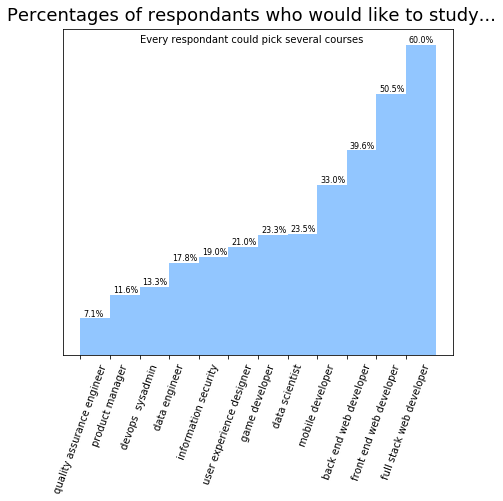

In [14]:
graph = pd.DataFrame([0,0,0,0,0,0,0,0,0,0,0,0])
graph["jobs"] = [x[1] for x in more_than_1]
graph["percentages"] =  [more_than_1[x] for x in more_than_1]
graph = graph[["jobs","percentages"]]
graph.sort_values(["percentages"],inplace = True)

w = 1
x_axis = np.arange(0, len(more_than_1.keys())*w, w) 

plt.style.use('seaborn-pastel')
fig, ax = plt.subplots(figsize=(7, 6))
ax.bar(x_axis,graph['percentages'], width = w)
ax.set_xticks(x_axis-0.5)
ax.set_xticklabels(more_than_1.keys(), rotation=70)
ax.get_yaxis().set_visible(False)
plt.figtext(.5,.9,'Percentages of respondants who would like to study...', fontsize=18, ha='center')
plt.figtext(.5,.85,'Every respondant could pick several courses',fontsize=10,ha='center')
for i, v in enumerate(round(graph['percentages'],1)):
    plt.text(x_axis[i] - 0.4 , v + 0.5, str(v)+"%", size = 8 )
    

plt.show()

Our focus on web and mobile development courses as it is what our company is selling. We can see that those represent the top subjects people would like to learn, this sound promising. However as people could choose different topics, maybe the one who chose web development are the exact same that chose mobile development, which would reduce the total number of people interested. 

Let's see how many people are interested in at least one of these two subjects.

6992


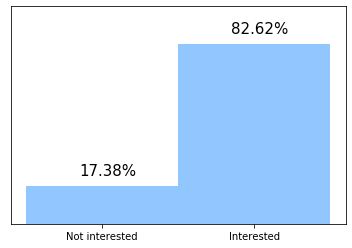

In [15]:
clean_jobs= survey[survey['JobRoleInterest'].notnull()]['JobRoleInterest'].copy()
nr_of_mobile_web = 0

for liste in clean_jobs:
    for element in liste:
        if 'web developer' in element:
            nr_of_mobile_web += 1
            break


nr_of_respondant_to_jobrole = clean_jobs.count()
no_mobile_web = (nr_of_respondant_to_jobrole - nr_of_mobile_web)/nr_of_respondant_to_jobrole*100
nr_of_mobile_web = nr_of_mobile_web/nr_of_respondant_to_jobrole*100

y = [no_mobile_web ,nr_of_mobile_web]
x = ["Not interested","Interested"]

print(nr_of_respondant_to_jobrole)

pos = np.arange(len(y))
fig, ax = plt.bar(pos,y,width = 1)
plt.xticks(pos,x)
plt.ylim(0,100)
ax.axes.get_yaxis().set_visible(False)
for i,v in enumerate(y):
    plt.text( i-0.15,  v+ 5, str(round(v,2))+"%", size = 15 )


Out of the 38,47% who answered this question, more than 82% wished to learn Web or Mobile development. Due to the size of this sample, 6992 respondant, we can consider this information as valuable.

### Country ###

Now that we found out that the sample has the right categories of people for our purpose, we can begin analyzing it. We can start with finding out where these new coders are located, and what are the densities (how many coderes there are) for each location.

In order to do that we have the "CountryLive" column that can help us. If we remember our goal : we want to know where to advertize, in which two best countries for our courses.

We will only work with a shorter dataset with only people who answered about the role they would be interested in.



In [16]:
countries = survey.copy()
countries.dropna(subset=['JobRoleInterest'],inplace  = True)


country_live = countries["CountryLive"].value_counts()
country_live_pct = round(countries["CountryLive"].value_counts(normalize = True)*100,2)

country = pd.DataFrame(data = {'country frequency' :country_live,'country percentage' : country_live_pct})
country.reset_index(inplace = True)
country.rename(columns = {'index': 'country'}, inplace = True)

print(country.info())
country.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
country               137 non-null object
country frequency     137 non-null int64
country percentage    137 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB
None


,country,country frequency,country percentage
0,United States of America,3125,45.70
1,India,528,7.72
2,United Kingdom,315,4.61
3,Canada,260,3.80
4,Poland,131,1.92


We only printed the top 5 countries but they are 137 of them represented!

Let's regroup all the "small" countries under the "Others" group and vizualise those data.


In [17]:
country.loc[country['country percentage'] < 1, 'country'] = "Others"
country = country.groupby("country").sum().sort_values("country frequency", ascending = False).reset_index()
country

,country,country frequency,country percentage
0,United States of America,3125,45.70
1,Others,1615,23.45
2,India,528,7.72
3,United Kingdom,315,4.61
4,Canada,260,3.80
5,Poland,131,1.92
6,Brazil,129,1.89
7,Germany,125,1.83
8,Australia,112,1.64
9,Russia,102,1.49


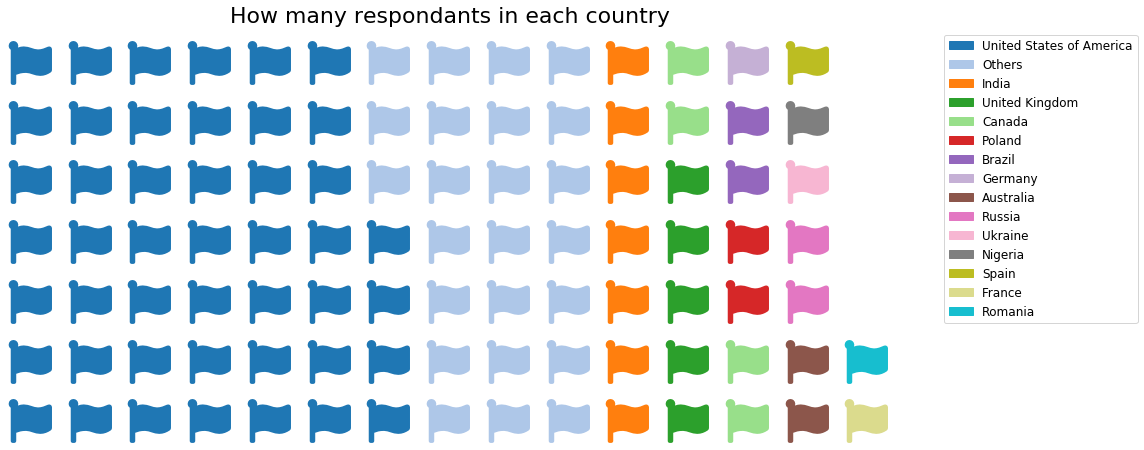

In [18]:
n_categories = country.shape[0]
colors = [plt.cm.tab20(i/float(n_categories)) for i in range(n_categories)]

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': country['country percentage'],
            'labels': [i for i in country["country"]],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'How many respondants in each country', 'loc': 'center', 'fontsize':22}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9),
    icons = "flag"
)


We will take into account the 4 most popular countries : USA, India, UK and Canada and perform a deeper analysis in order to select the 2 best countries for our advertising campaigns. 

We chose those countries because of their high frequencies but also because english is a national language in those places (and our courses are in english!)

### Money willing to spend

We need to find a country where we would find a lot of learners, but learners that are willing to pay!

The *MoneyForLearning* column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of $59 per month, and for this reason we're interested in finding out how much money each student spends per month.



In [19]:
survey = survey[survey['JobRoleInterest'].notnull()].copy()
survey['MonthsProgramming'].replace(0,1, inplace=True)
survey['money_per_month'] = survey["MoneyForLearning"]/survey["MonthsProgramming"]
survey["money_per_month"].isnull().sum()

675

We can see that we have a lot of null values, let's create another DataFrame without those null values to focus on the analysis of how much money per month the participants paid. 

Plus we can get rid of the rows that do not specify any country where they live.

In [20]:
survey = survey[survey['money_per_month'].notnull()]
survey = survey[survey['CountryLive'].notnull()]

survey["money_per_month"].isnull().sum()

0

Now let's g roup the remaining data by the CountryLive column and find out how much money a student spends on average each month in the US, India, the United Kingdom and Canada.

In [21]:
top4_countries = ["United States of America","India","Canada","United Kingdom"]
top4_invest = survey[survey["CountryLive"].isin(top4_countries)].groupby("CountryLive")["money_per_month"].mean().reset_index().sort_values("money_per_month")
top4_countries_sorted = ["United Kingdom","Canada","India","USA"]

top4_invest

,CountryLive,money_per_month
2,United Kingdom,45.534443
0,Canada,113.510961
1,India,135.100982
3,United States of America,227.997996


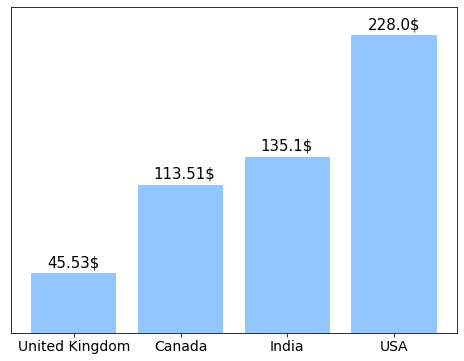

In [22]:
pos = np.arange(len(top4_invest["money_per_month"]))
plt.figure(figsize = (8,6))
plt.bar(pos,top4_invest.loc[:,"money_per_month"],width = 0.8)
frame1 = plt.gca()

plt.xticks(pos,top4_countries_sorted,size = 14)
plt.ylim(0,250)
frame1.axes.get_yaxis().set_visible(False)


for i,v in enumerate(top4_invest["money_per_month"]):
    plt.text( i-0.25,  v+ 5, str(round(v,2))+"$", size = 15 )


The results for the United Kingdom and Canada are surprisingly low relative to the values we see for India. If we considered a few socio-economical metrics (like GDP per capita), we'd intuitively expect people in the UK and Canada to spend more on learning than people in India.

It might be that we don't have have enough representative data for the United Kingdom, Canada, and India, or we have some outliers (maybe coming from wrong survey answers) making the mean too big for India, or too low for the UK and Canada. Or it might be that the results are correct.

### Identify extreme outliers###

Let's generate four box plots to visualize for each country (the US, India, the United Kingdom, Canada) the distribution of the variable that describes how much money each participant had spent per month.

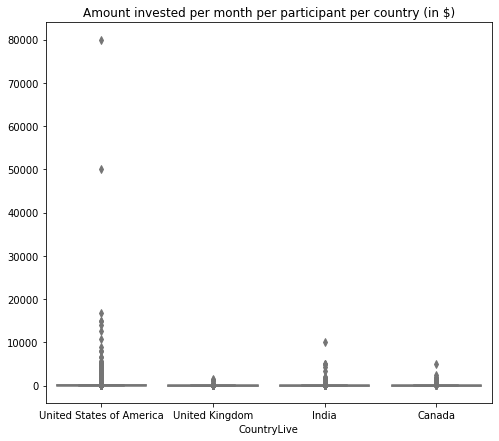

In [23]:
fig, ax = plt.subplots(figsize = (8,7))
sns.boxplot(x = "CountryLive", y = 'money_per_month' , data = survey[survey['CountryLive'].isin(top4_countries)])
plt.title('Amount invested per month per participant per country (in $)')
plt.ylabel("")
plt.show()

We can see some clear outliers especially in America and India. Let's first get rid of all the values above 10000 $ per month, which seems already really high for any formation.

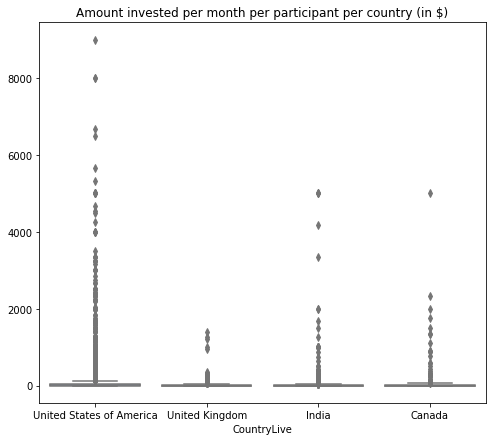

In [24]:
fig, ax = plt.subplots(figsize = (8,7))
sns.boxplot(x = "CountryLive", y = 'money_per_month' , data = survey[(survey['CountryLive'].isin(top4_countries)) & (survey['money_per_month'] < 10000)])
plt.title('Amount invested per month per participant per country (in $)')
plt.ylabel("")
plt.show()

We can see quite a lot of respondants who declared to pay 2000 $ or more per month, let's take a look at those in details to understand if it comes from BootCamp and TechEvent that can be quite expensive

In [25]:
survey[(survey['CountryLive'] == 'Canada') & (survey['money_per_month'].between(2000,10000))].sort_values(by = 'CountryLive')

,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FirstDevJob,Gender,HasDebt,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobRoleInterest,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,money_per_month
6590,20.0,1.0,Canada,NaN,Not working but looking for work,50000.0,NaN,female,0.0,NaN,1.0,0.0,0.0,"[game developer, mobile developer]",14023.0,6.0,"trade, technical, or vocational training",NaN,2337.166667
8726,39.0,0.0,Canada,software development and IT,Employed for wages,65000.0,NaN,male,0.0,48000.0,0.0,0.0,0.0,"[full stack web developer, back end web develo...",2000.0,1.0,"some college credit, no degree",NaN,2000.000000
13659,24.0,1.0,Canada,finance,Employed for wages,60000.0,NaN,male,1.0,140000.0,1.0,1.0,0.0,"[mobile developer, full stack web developer, d...",10000.0,2.0,bachelor's degree,Finance,5000.000000


When it comes to Canada we wil discard the 2 participants that are new to programming and they enrolled in a boot camp, so their money went on the bootcamp and they would not be interested in our offer.

In [26]:
survey[(survey['CountryLive'] == 'India') & (survey['money_per_month'].between(2000,10000))].sort_values(by = 'CountryLive')

,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FirstDevJob,Gender,HasDebt,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobRoleInterest,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,money_per_month
1728,24.0,0.0,India,NaN,A stay-at-home parent or homemaker,70000.0,NaN,male,0.0,NaN,0.0,0.0,0.0,"[user experience designer, mobile developer, p...",20000.0,4.0,bachelor's degree,Computer Programming,5000.000000
1755,20.0,0.0,India,NaN,Not working and not looking for work,100000.0,NaN,male,0.0,NaN,0.0,0.0,0.0,"[information security, full stack web develope...",50000.0,15.0,bachelor's degree,Computer Science,3333.333333
7989,28.0,0.0,India,software development and IT,Employed for wages,500000.0,NaN,male,1.0,300000.0,0.0,0.0,0.0,"[user experience designer, back end web develo...",5000.0,1.0,bachelor's degree,Aerospace and Aeronautical Engineering,5000.000000
8126,22.0,0.0,India,NaN,Not working but looking for work,80000.0,NaN,male,1.0,NaN,0.0,0.0,0.0,"[back end web developer, full stack web develo...",5000.0,1.0,bachelor's degree,Electrical and Electronics Engineering,5000.000000
9410,38.0,0.0,India,NaN,Not working but looking for work,80000.0,NaN,male,1.0,NaN,0.0,0.0,0.0,"[user experience designer, data scientist, mob...",2000.0,1.0,bachelor's degree,Design and Visual Communications,2000.000000
12451,24.0,0.0,India,NaN,Not working but looking for work,60000.0,NaN,male,0.0,NaN,0.0,0.0,0.0,"[mobile developer, front end web developer]",8000.0,4.0,bachelor's degree,Information Technology,2000.000000
13398,19.0,0.0,India,NaN,Unable to work,100000.0,NaN,male,0.0,NaN,0.0,0.0,0.0,[mobile developer],20000.0,2.0,bachelor's degree,Computer Science,10000.000000
15587,27.0,0.0,India,software development and IT,Employed for wages,65000.0,NaN,male,1.0,60000.0,0.0,0.0,0.0,"[full stack web developer, data scientist]",100000.0,24.0,bachelor's degree,Communications,4166.666667


Nobody in India seems to have participated in a boot camp, so we do not really know where they might have spent their money. 

It seems that some people form India might have mistaken their students fees and the "MoneyFor Learning" column. We will get rid of those outliers directly.

In [27]:
survey = survey[~((survey['CountryLive'] == 'India') & (survey['money_per_month'].between(2000,10000)))]

In [28]:
survey[(survey['CountryLive'] == 'United Kingdom') & (survey['money_per_month'].between(2000,10000))].sort_values(by = 'CountryLive')

,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FirstDevJob,Gender,HasDebt,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobRoleInterest,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,money_per_month


In [29]:
survey[(survey['CountryLive'] == 'United States of America') & (survey['money_per_month'].between(2000,10000))].sort_values(by = 'CountryLive')

,Age,AttendedBootcamp,CountryLive,EmploymentField,EmploymentStatus,ExpectedEarning,FirstDevJob,Gender,HasDebt,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,JobRoleInterest,MoneyForLearning,MonthsProgramming,SchoolDegree,SchoolMajor,money_per_month
415,26.0,1.0,United States of America,education,Employed for wages,60000.0,NaN,male,1.0,36000.0,0.0,0.0,0.0,"[full stack web developer, front end web devel...",14000.0,6.0,"some college credit, no degree",NaN,2333.333333
7925,22.0,1.0,United States of America,NaN,Not working but looking for work,30000.0,NaN,male,1.0,NaN,1.0,0.0,0.0,"[front end web developer, game developer, back...",11000.0,5.0,"some college credit, no degree",NaN,2200.000000
8030,NaN,0.0,United States of America,NaN,Doing an unpaid internship,100000.0,NaN,male,0.0,NaN,0.0,0.0,0.0,"[back end web developer, full stack web develo...",120000.0,36.0,bachelor's degree,Computer Software Engineering,3333.333333
8120,56.0,0.0,United States of America,NaN,NaN,30000.0,NaN,male,1.0,NaN,0.0,0.0,0.0,"[devops sysadmin, game developer, information...",2500.0,1.0,"trade, technical, or vocational training",NaN,2500.000000
8202,NaN,1.0,United States of America,NaN,NaN,20000.0,NaN,female,0.0,NaN,NaN,0.0,0.0,[full stack web developer],15000.0,3.0,some high school,NaN,5000.000000
8901,30.0,1.0,United States of America,NaN,Not working but looking for work,75000.0,NaN,female,1.0,NaN,1.0,0.0,0.0,"[game developer, data engineer, devops sysadm...",15000.0,3.0,bachelor's degree,Business Administration,5000.000000
9145,35.0,1.0,United States of America,NaN,Not working but looking for work,90000.0,NaN,female,0.0,NaN,1.0,0.0,0.0,"[back end web developer, full stack web develo...",20000.0,9.0,bachelor's degree,Linguistics,2222.222222
9248,28.0,1.0,United States of America,NaN,Not working but looking for work,50000.0,NaN,female,0.0,NaN,0.0,0.0,0.0,"[data engineer, game developer, data scientist...",11000.0,4.0,bachelor's degree,Education,2750.000000
9559,30.0,1.0,United States of America,NaN,Not working but looking for work,70000.0,NaN,female,1.0,NaN,0.0,0.0,0.0,"[mobile developer, full stack web developer, f...",20000.0,8.0,master's degree (non-professional),English,2500.000000
9778,33.0,1.0,United States of America,education,Employed for wages,55000.0,NaN,male,1.0,20000.0,0.0,0.0,0.0,"[full stack web developer, data engineer, qual...",8000.0,1.0,master's degree (non-professional),Chemical Engineering,8000.000000


Finally in USA we have more outliers, we are going to filter them and discard the one who did not attend a bootcamp (lack of information) or that are new to programming (they already spent their money in the bootcamp).

We will apply the same filter to all countries : you need to have more than 3 months of programming and attended a bootcamp to justify this amount of expenses.

In [30]:
survey = survey[survey['CountryLive'].isin(top4_countries)]
survey = survey[~((survey['MonthsProgramming'] < 3) & (survey["money_per_month"] > 2000))]
survey = survey[~((survey['AttendedBootcamp'] == 1) & (survey["money_per_month"] > 2000))]
           

After getting rid of those outliers, let's visualize our boxplots again.

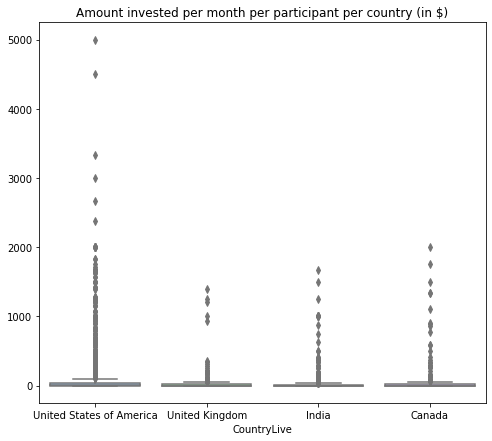

In [32]:
fig, ax = plt.subplots(figsize = (8,7))
sns.boxplot(x = "CountryLive", y = 'money_per_month' , data = survey[survey['money_per_month'] < 10000])
plt.title('Amount invested per month per participant per country (in $)')
plt.ylabel("")
plt.show()

In [33]:
top4_countries = ["United States of America","India","Canada","United Kingdom"]
top4_invest_new = survey.groupby("CountryLive")["money_per_month"].mean().reset_index().sort_values("money_per_month")
top4_invest_new

,CountryLive,money_per_month
2,United Kingdom,45.534443
1,India,57.256604
0,Canada,83.636403
3,United States of America,110.893851


### Conclusions ###

Considering the results we've found so far, one country we should definitely advertise in is the US. There are a lot of new coders living there and they are willing to pay a good amount of money each month.

When it comes to the second countries, as our fees would be of 59$/month we should not go for United Kingdom for sure, but the choice is not obvious between India and Canada. Both countries would be willing to spend the amount we are asking for. 

However we can see that we have more replies from India and we know that it is a rapidly increasing market potential. There is support for higher innovation and digitalization by the government policies, make compelling reasons for upskill of current, or skill development for future workforce.

For those reasons we will choose India as our second choice!

For now it would not make sense to advertise in more countries. We should start with those two and analyse the results of our ad campaign in a first place.

We can now ask ourselves if it makes sense to split the advertising budget unequally or how to select the audience we would like to target exactly! 
